In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install yfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.2 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 3.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-cp310-cp310-linux_x86_64.whl size=293633 sha256=eab43b4031729f663a2ee8facb9eed0348f4730a58bd8c5b9ab2b824a9930499
  Stored in directory: /root/.cache/pip/wheels/4b/b9/b0/83d6e258e8f963f5ff111a2cd8c483ca59372a86e6a2535212
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import pandas as pd

ticker = 'AAPL'
stock = yf.Ticker(ticker)


live_price = stock.history(period="1d", interval="1m")  
print(live_price)

df = pd.DataFrame(live_price)


                                 Open        High         Low       Close  \
Datetime                                                                    
2024-09-13 09:30:00-04:00  223.595001  223.850006  222.830002  222.830002   
2024-09-13 09:31:00-04:00  222.809998  223.020004  222.380005  222.800003   
2024-09-13 09:32:00-04:00  222.816299  222.899994  222.241196  222.290100   
2024-09-13 09:33:00-04:00  222.279999  222.899994  222.279999  222.800003   
2024-09-13 09:34:00-04:00  222.849792  222.960007  222.600006  222.919998   
...                               ...         ...         ...         ...   
2024-09-13 15:55:00-04:00  222.470001  222.669998  222.330002  222.490005   
2024-09-13 15:56:00-04:00  222.520004  222.559998  222.399994  222.464996   
2024-09-13 15:57:00-04:00  222.460007  222.509995  222.339996  222.470001   
2024-09-13 15:58:00-04:00  222.470001  222.520004  222.419998  222.460007   
2024-09-13 15:59:00-04:00  222.460007  222.470001  222.389999  222.460007   

In [4]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-09-13 09:30:00-04:00,223.595001,223.850006,222.830002,222.830002,1900098,0.0,0.0
2024-09-13 09:31:00-04:00,222.809998,223.020004,222.380005,222.800003,245742,0.0,0.0
2024-09-13 09:32:00-04:00,222.816299,222.899994,222.241196,222.290100,200969,0.0,0.0
2024-09-13 09:33:00-04:00,222.279999,222.899994,222.279999,222.800003,240629,0.0,0.0
2024-09-13 09:34:00-04:00,222.849792,222.960007,222.600006,222.919998,132071,0.0,0.0


In [18]:
import yfinance as yf
from datetime import datetime, timedelta


def get_stock_data(company_names, tickers):
    end_date = datetime.now()
    start_date = end_date - timedelta(days=30*7)  # Approx. 7 months

    company_data = {}

    
    for company, ticker in zip(company_names, tickers):
        stock = yf.Ticker(ticker)
        
        
        stock_data = stock.history(start=start_date, end=end_date, interval='1d')
        
        
        stock_data['Company'] = company
        
        
        company_data[company] = stock_data

    return company_data


tickers = input("Enter company tickers (comma-separated): ").split(',')
company_names = input("Enter company names corresponding to tickers (comma-separated): ").split(',')


if len(tickers) != len(company_names):
    print("Error: Number of company names and tickers must be the same.")
else:
    
    stock_data = get_stock_data(company_names, tickers)

   
    for company in company_names:
        print(f"\nData for {company}:")
        print(stock_data[company].head())
        exec(f"{company.lower()}_data = stock_data['{company}']")

Enter company tickers (comma-separated):  AAPL,MSFT,GOOGL,AMZN
Enter company names corresponding to tickers (comma-separated):  Apple,Microsoft,Google,Amazon



Data for Apple:
                                 Open        High         Low       Close  \
Date                                                                        
2024-02-20 00:00:00-05:00  181.333865  181.972259  179.548363  181.104446   
2024-02-21 00:00:00-05:00  181.483497  182.431111  180.206710  181.862549   
2024-02-22 00:00:00-05:00  183.019628  184.495926  182.002198  183.907394   
2024-02-23 00:00:00-05:00  184.545785  184.575708  181.772761  182.062042   
2024-02-26 00:00:00-05:00  181.782752  182.301436  180.196729  180.705460   

                             Volume  Dividends  Stock Splits Company  
Date                                                                  
2024-02-20 00:00:00-05:00  53665600        0.0           0.0   Apple  
2024-02-21 00:00:00-05:00  41529700        0.0           0.0   Apple  
2024-02-22 00:00:00-05:00  52292200        0.0           0.0   Apple  
2024-02-23 00:00:00-05:00  45119700        0.0           0.0   Apple  
2024-02-26 00:00:

In [19]:
apple_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
Date,,,,,,,,
2024-02-20 00:00:00-05:00,181.333865,181.972259,179.548363,181.104446,53665600,0.0,0.0,Apple
2024-02-21 00:00:00-05:00,181.483497,182.431111,180.206710,181.862549,41529700,0.0,0.0,Apple
2024-02-22 00:00:00-05:00,183.019628,184.495926,182.002198,183.907394,52292200,0.0,0.0,Apple
2024-02-23 00:00:00-05:00,184.545785,184.575708,181.772761,182.062042,45119700,0.0,0.0,Apple
2024-02-26 00:00:00-05:00,181.782752,182.301436,180.196729,180.705460,40867400,0.0,0.0,Apple


In [20]:
amazon_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
Date,,,,,,,,
2024-02-20 00:00:00-05:00,167.830002,168.710007,165.740005,167.080002,41980300,0.0,0.0,Amazon
2024-02-21 00:00:00-05:00,168.940002,170.229996,167.139999,168.589996,44575600,0.0,0.0,Amazon
2024-02-22 00:00:00-05:00,173.100006,174.800003,171.770004,174.580002,55392400,0.0,0.0,Amazon
2024-02-23 00:00:00-05:00,174.279999,175.750000,173.699997,174.990005,59715200,0.0,0.0,Amazon
2024-02-26 00:00:00-05:00,175.699997,176.369995,174.259995,174.729996,44368600,0.0,0.0,Amazon


In [21]:
apple_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,144.000000,144.000000,144.000000,144.000000,1.440000e+02,144.000000,144.0
mean,197.387615,199.369905,195.501889,197.445391,6.183936e+07,0.003472,0.0
std,22.847761,23.133043,22.317735,22.843413,3.002949e+07,0.029360,0.0
min,164.935118,165.982480,163.668309,164.585999,3.029900e+07,0.000000,0.0
25%,173.600819,176.022230,171.954960,173.017284,4.477558e+07,0.000000,0.0
50%,192.362341,193.770715,191.313552,192.512169,5.266695e+07,0.000000,0.0
75%,220.632507,222.174999,217.463721,220.827507,6.885590e+07,0.000000,0.0
max,236.206595,236.955728,232.820515,234.548523,2.464214e+08,0.250000,0.0


In [22]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2024-02-20 00:00:00-05:00 to 2024-09-13 00:00:00-04:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          144 non-null    float64
 1   High          144 non-null    float64
 2   Low           144 non-null    float64
 3   Close         144 non-null    float64
 4   Volume        144 non-null    int64  
 5   Dividends     144 non-null    float64
 6   Stock Splits  144 non-null    float64
 7   Company       144 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


Enter the ticker symbols of 4 companies (separated by commas):   AAPL,MSFT,GOOGL,AMZN


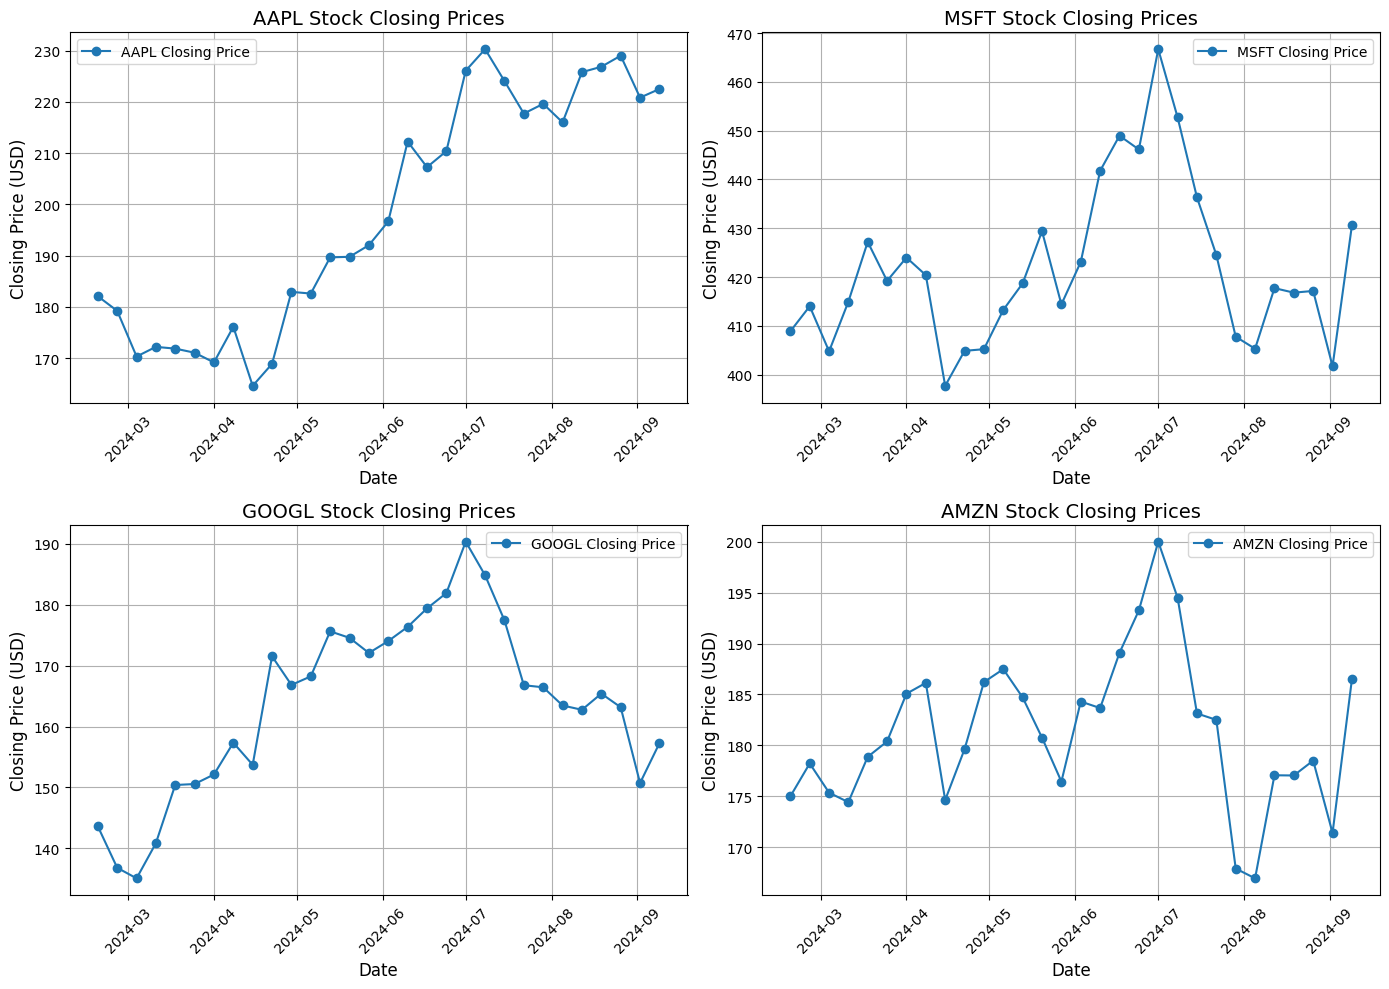

In [27]:
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta


def get_stock_data(company_names):
    end_date = datetime.now()
    start_date = end_date - timedelta(days=30 * 7)  # Last 7 months

    company_data = {}
    
    for company in company_names:
        ticker = yf.Ticker(company)
        stock_data = ticker.history(start=start_date, end=end_date, interval='1wk')
        company_data[company] = stock_data
    
    return company_data


def plot_stock_data(company_data, companies):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))  
    axes = axes.flatten()  
    
    for i, company in enumerate(companies):
        axes[i].plot(company_data[company].index, company_data[company]['Close'], label=f'{company} Closing Price', marker='o')
        axes[i].set_title(f'{company} Stock Closing Prices', fontsize=14)
        axes[i].set_xlabel('Date', fontsize=12)
        axes[i].set_ylabel('Closing Price (USD)', fontsize=12)
        axes[i].legend()
        axes[i].grid(True)
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

input_companies = input("Enter the ticker symbols of 4 companies (separated by commas): ").split(',')


input_companies = [company.strip() for company in input_companies][:4]


stock_data = get_stock_data(input_companies)

# Plot stock data for the input companies
plot_stock_data(stock_data, input_companies)


In [36]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

class stock_analyse:
    def __init__(self, companies):
        self.companies = companies
        self.company_data = {}
        self.start_date = datetime.now() - timedelta(days=30*7)
        self.end_date = datetime.now() 

    def export_data(self):
        for company in self.companies:
            ticker = yf.Ticker(company)
            stock_data = ticker.history(start=self.start_date, end=self.end_date, interval='1wk')
            self.company_data[company] = stock_data

    def plot_graph(self):
        num_companies = len(self.companies)
        num_rows = (num_companies + 1) // 2 
        fig, axes = plt.subplots(num_rows, 2, figsize=(14, 5*num_rows)) 
        
        axes = axes.flatten() if num_companies > 1 else [axes]
    
        for i, company in enumerate(self.companies):
            axes[i].plot(self.company_data[company].index, self.company_data[company]['Close'], label=f'{company} Closing Price', marker='o')
            axes[i].set_title(f'{company} Stock Closing Prices', fontsize=14)
            axes[i].set_xlabel('Date', fontsize=12)
            axes[i].set_ylabel('Closing Price (USD)', fontsize=12)
            axes[i].legend()
            axes[i].grid(True)
            axes[i].tick_params(axis='x', rotation=45)
        
        for j in range(num_companies, len(axes)):
            fig.delaxes(axes[j])
        
        plt.tight_layout()
        plt.show()

    def plot_volume(self):
        num_companies = len(self.companies)
        num_rows = (num_companies + 1) // 2 
        fig, axes = plt.subplots(num_rows, 2, figsize=(14, 5*num_rows)) 
        
        axes = axes.flatten() if num_companies > 1 else [axes]
    
        for i, company in enumerate(self.companies):
            axes[i].plot(self.company_data[company].index, self.company_data[company]['Volume'], label=f'{company} Volume', marker='o')
            axes[i].set_title(f'{company} Trading Volume', fontsize=14)
            axes[i].set_xlabel('Date', fontsize=12)
            axes[i].set_ylabel('Volume', fontsize=12)
            axes[i].legend()
            axes[i].grid(True)
            axes[i].tick_params(axis='x', rotation=45)
        
        for j in range(num_companies, len(axes)):
            fig.delaxes(axes[j])
        
        plt.tight_layout()
        plt.show()

        


Enter the ticker symbols of companies (separated by commas):  AAPL, MSFT, GOOGL, AMZN


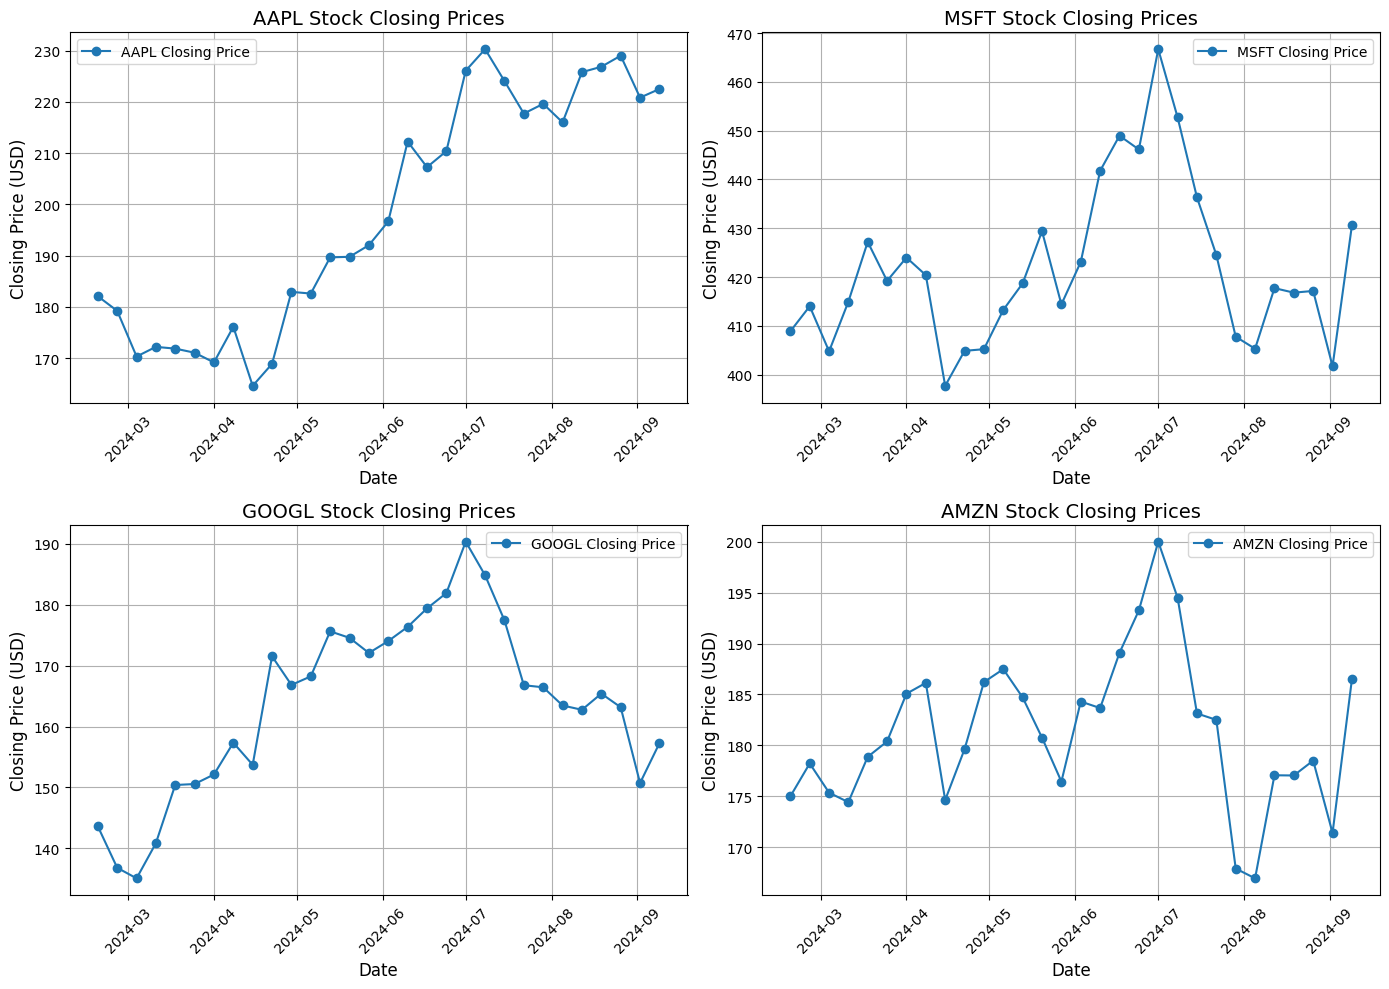

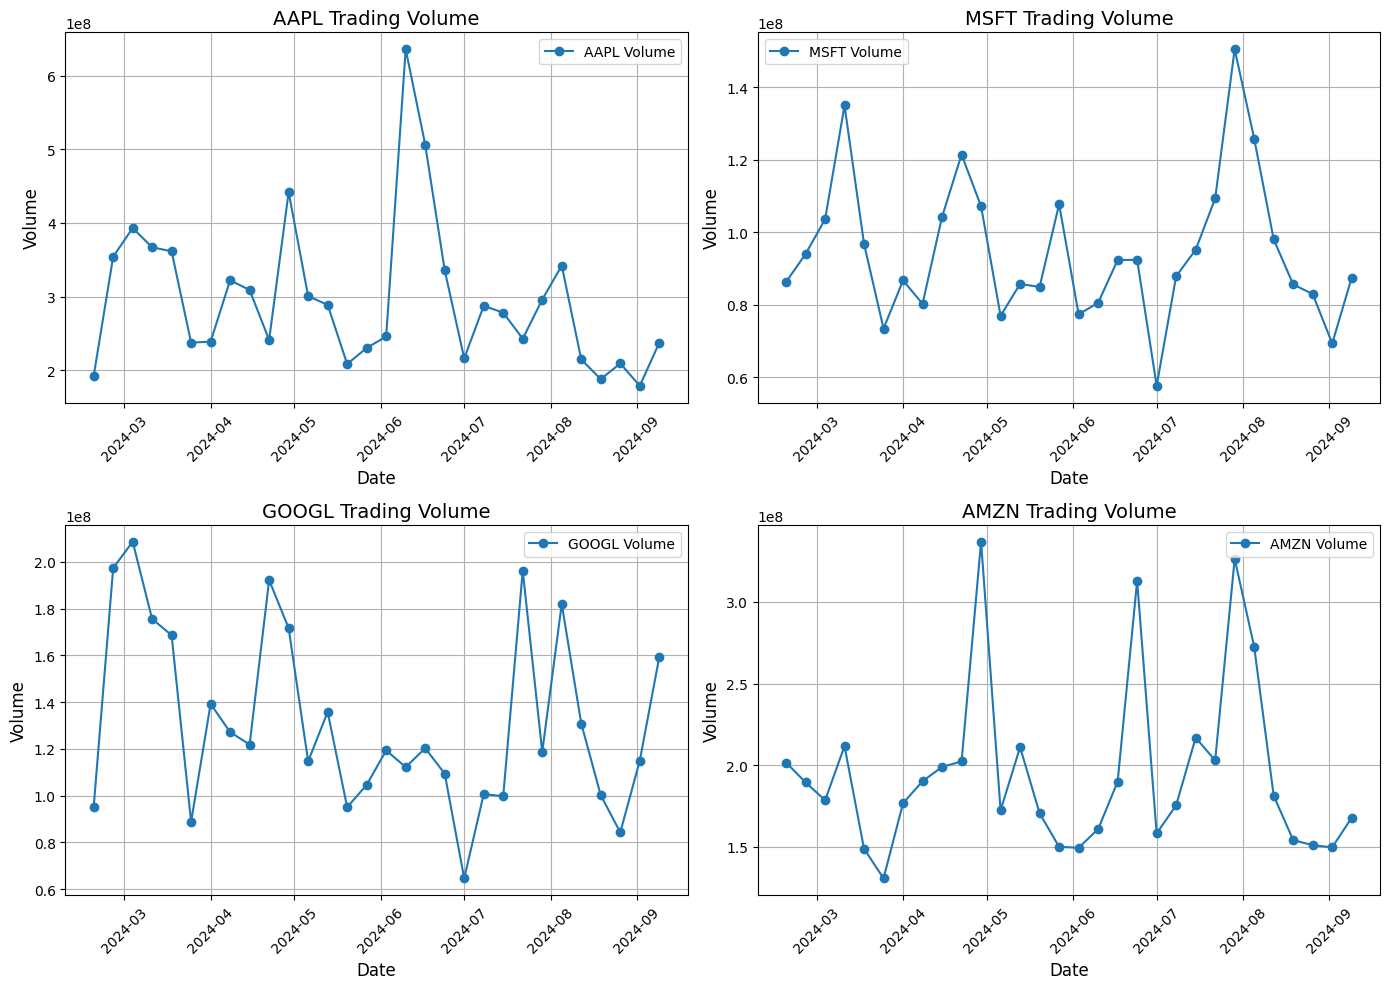

In [37]:
if __name__ == "__main__":
    input_companies = input("Enter the ticker symbols of companies (separated by commas): ").split(',')
    input_companies = [company.strip() for company in input_companies]
    
    
    analyzer = stock_analyse(input_companies)
    
   
    analyzer.export_data()
    analyzer.plot_graph()
    analyzer.plot_volume()

In [38]:
apple_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
Date,,,,,,,,
2024-02-20 00:00:00-05:00,181.333865,181.972259,179.548363,181.104446,53665600,0.0,0.0,Apple
2024-02-21 00:00:00-05:00,181.483497,182.431111,180.206710,181.862549,41529700,0.0,0.0,Apple
2024-02-22 00:00:00-05:00,183.019628,184.495926,182.002198,183.907394,52292200,0.0,0.0,Apple
2024-02-23 00:00:00-05:00,184.545785,184.575708,181.772761,182.062042,45119700,0.0,0.0,Apple
2024-02-26 00:00:00-05:00,181.782752,182.301436,180.196729,180.705460,40867400,0.0,0.0,Apple


**MOVING AVERAGE**

In [113]:

        
class stock_graphs:
    def __init__(self, companies):
        self.companies = companies
        self.company_data = {}
        self.ma_days=[5,10,15]
        self.start_date = datetime.now() - timedelta(days=30*7)
        self.end_date = datetime.now()
    
    def export_data(self):
        for company in self.companies:
            ticker = yf.Ticker(company)
            stock_data = ticker.history(start=self.start_date, end=self.end_date, interval='1d')
            for ma in self.ma_days:
                stock_data[f"MA for {ma} days"] = stock_data['Close'].rolling(window=ma).mean()
            self.company_data[company] = stock_data
            
        
    def plot_moving_averages(self):
        num_companies = len(self.companies)
        num_rows = (num_companies + 1) // 2  
        num_cols = 2 
        
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
        if num_companies == 1:
            axes = [axes]  
        else:
            axes = axes.flatten()
        for i, company in enumerate(self.companies):
            if i < len(axes):
                data = self.company_data.get(company)
                if data is not None:
                    data[['Close'] + [f"MA for {ma} days" for ma in self.ma_days]].plot(ax=axes[i])
                    axes[i].set_title(company)
        
      
        for j in range(num_companies, len(axes)):
            fig.delaxes(axes[j])
        
        fig.tight_layout()
        plt.show()
        
    def per_change(self):
    
        for company in self.companies:
            data = self.company_data.get(company)
            if data is not None:
                data['Daily Return'] = data['Close'].pct_change()  # Percentage change calculation

        num_companies = len(self.companies)
        num_rows = (num_companies + 1) // 2  
        num_cols = 2 

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
        if num_companies == 1:
            axes = [axes]  
        else:
            axes = axes.flatten()

        for i, company in enumerate(self.companies):
            if i < len(axes):
                data = self.company_data.get(company)
                if data is not None:
                    axes[i].plot(data.index, data['Daily Return'], label=f'{company} Daily Return', marker='o')
                    axes[i].set_title(f'{company} Daily Return', fontsize=14)
                    axes[i].set_xlabel('Date', fontsize=12)
                    axes[i].set_ylabel('Daily Return', fontsize=12)
                    axes[i].legend()
                    axes[i].grid(True)
                    axes[i].tick_params(axis='x', rotation=45)

        for j in range(num_companies, len(axes)):
            fig.delaxes(axes[j])

        fig.tight_layout()
        plt.show()

            
    


Enter the ticker symbols of companies (separated by commas):   AAPL, MSFT, GOOGL, AMZN


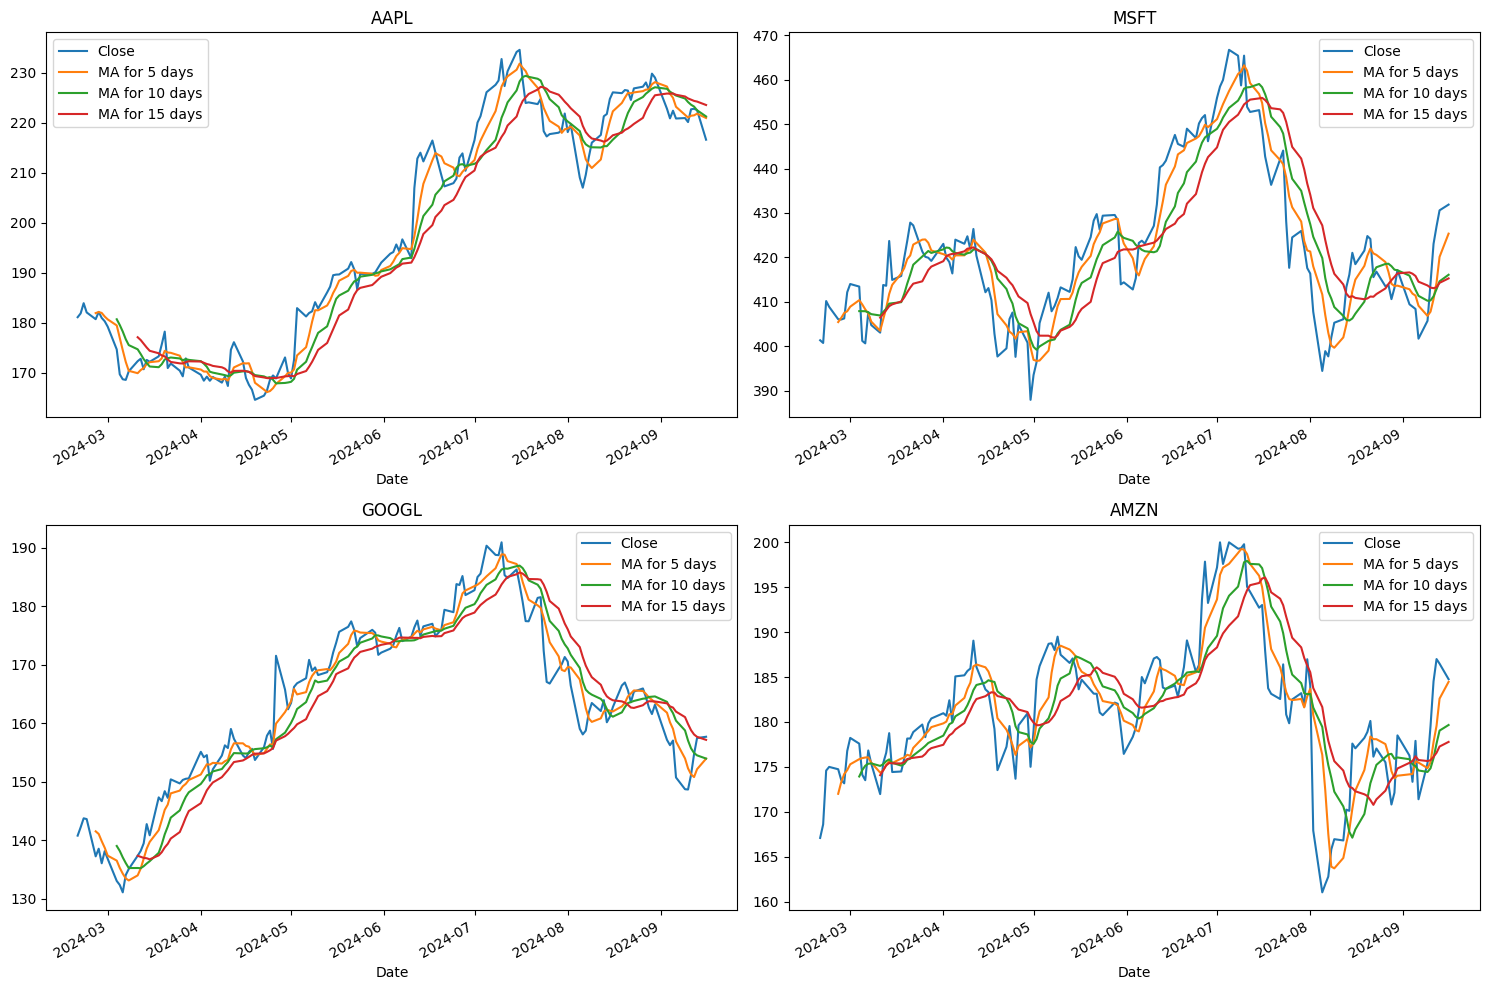

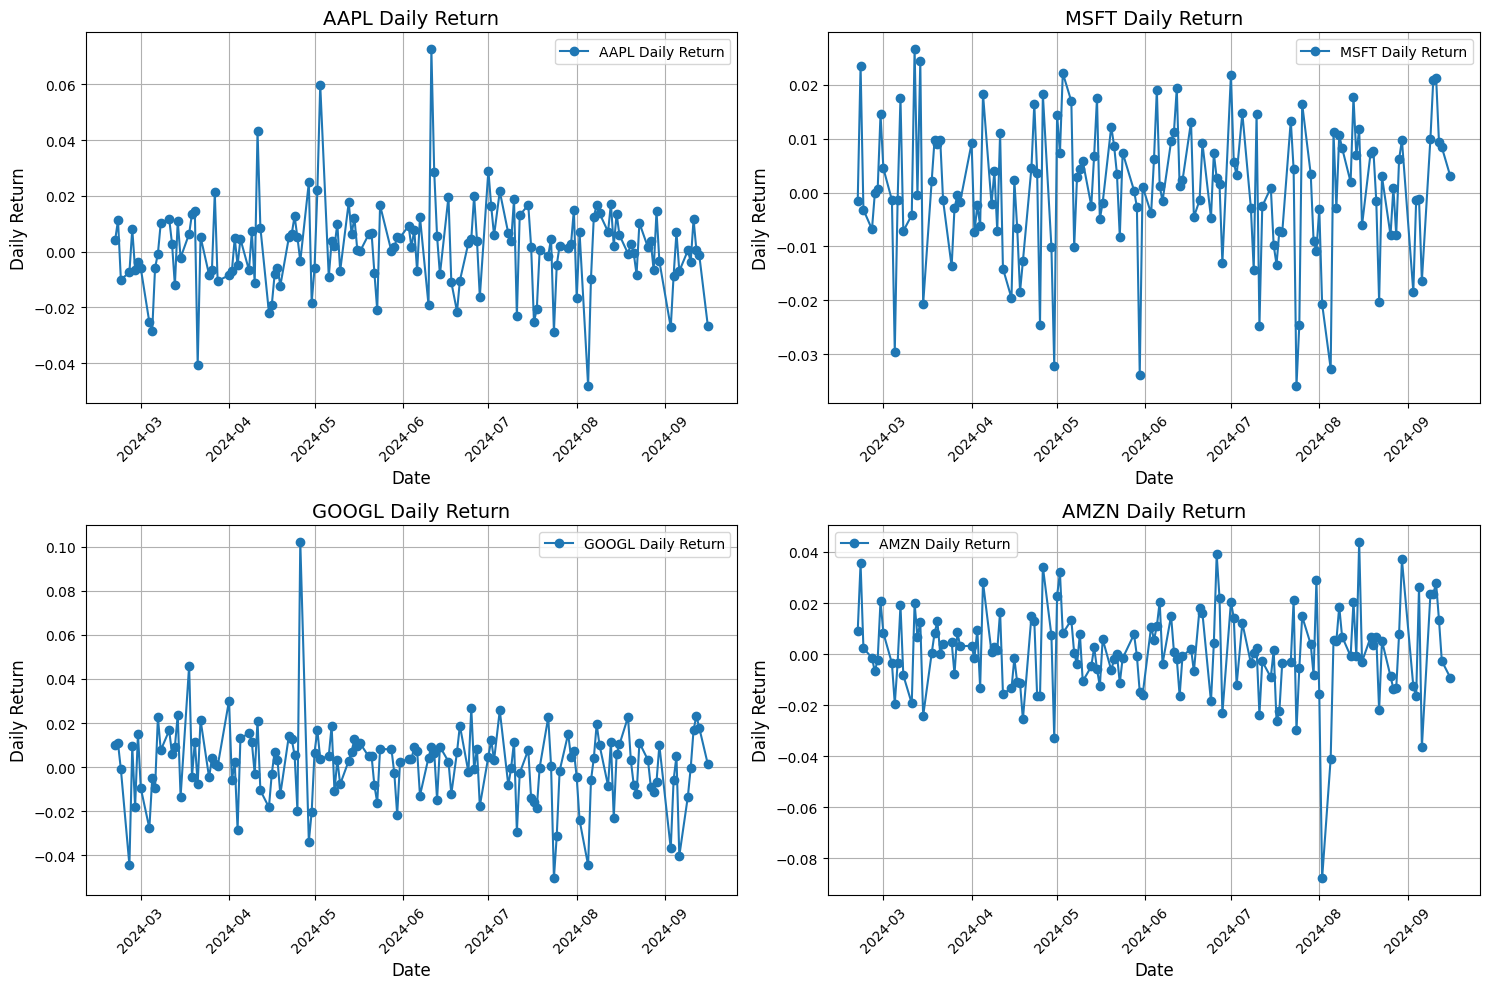

In [114]:
if __name__ == "__main__":
    input_companies = input("Enter the ticker symbols of companies (separated by commas): ").split(',')
    input_companies = [company.strip() for company in input_companies]
    
    
    analyzer = stock_graphs(input_companies)
    
    analyzer.export_data()
    analyzer.plot_moving_averages()
    analyzer.per_change()
   
   
        

**COORELATION**

*Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].*

In [109]:
class stock_corr:
    def __init__(self, companies):
        self.companies = companies
        self.company_data = {}
        self.ma_days=[5,10,15]
        self.start_date = datetime.now() - timedelta(days=30*7)
        self.end_date = datetime.now()
        self.correlation_matrix=[]
    
    def export_data(self):
        for company in self.companies:
            ticker = yf.Ticker(company)
            stock_data = ticker.history(start=self.start_date, end=self.end_date, interval='1d')
            self.company_data[company] = stock_data
    def co_relation(self):
        combine_data=pd.DataFrame()
       
        for company in self.companies:
            data=self.company_data.get(company)
            if data is not None:
                combine_data[company]=data['Close']
                
        combine_data = combine_data.dropna()
        
        correlation_matrix = combined_data.corr()
        
        print(correlation_matrix)
    
  
        import seaborn as sns
        import matplotlib.pyplot as plt
       
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title('Correlation Matrix of Stock Prices')
        plt.show()
            
    def plot_pairplot(self):
    
        plot_data = pd.DataFrame()
        for company in self.companies:
            data = self.company_data.get(company)
            if data is not None:
                plot_data[company] = data['Close']
                plot_data['Date'] = data.index

        plot_data = plot_data.reset_index(drop=True)  

    
        sns.pairplot(plot_data, kind='reg')
        plt.show()
    
    def kde_plot(self):
    
        plot_data = pd.DataFrame()
        for company in self.companies:
            data = self.company_data.get(company)
            if data is not None:
                plot_data[company] = data['Close']
                plot_data['Date'] = data.index

        plot_data = plot_data.reset_index(drop=True)  

    
        return_fig = sns.PairGrid(plot_data.dropna())


        return_fig.map_upper(plt.scatter, color='purple')

 

        return_fig.map_lower(sns.kdeplot, cmap='cool_d')


        return_fig.map_diag(plt.hist, bins=30)
        plt.show()


Enter the ticker symbols of companies (separated by commas):  AAPL, MSFT, GOOGL, AMZN


                  Open      High       Low     Close    Volume  Dividends  \
Open          1.000000  0.999834  0.999797  0.999587 -0.376115   0.073517   
High          0.999834  1.000000  0.999801  0.999806 -0.372136   0.073686   
Low           0.999797  0.999801  1.000000  0.999848 -0.379151   0.074603   
Close         0.999587  0.999806  0.999848  1.000000 -0.375792   0.074930   
Volume       -0.376115 -0.372136 -0.379151 -0.375792  1.000000  -0.034113   
Dividends     0.073517  0.073686  0.074603  0.074930 -0.034113   1.000000   
Stock Splits       NaN       NaN       NaN       NaN       NaN        NaN   

              Stock Splits  
Open                   NaN  
High                   NaN  
Low                    NaN  
Close                  NaN  
Volume                 NaN  
Dividends              NaN  
Stock Splits           NaN  


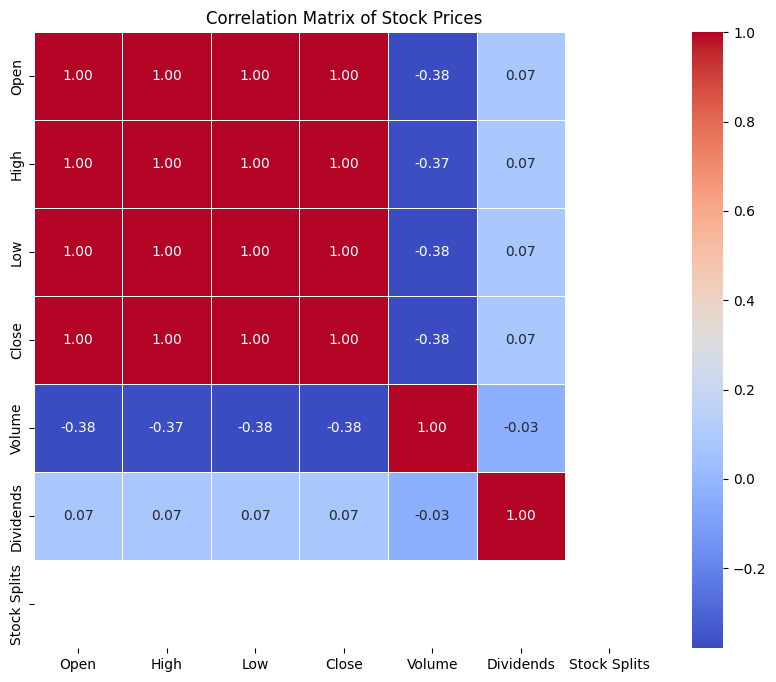

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

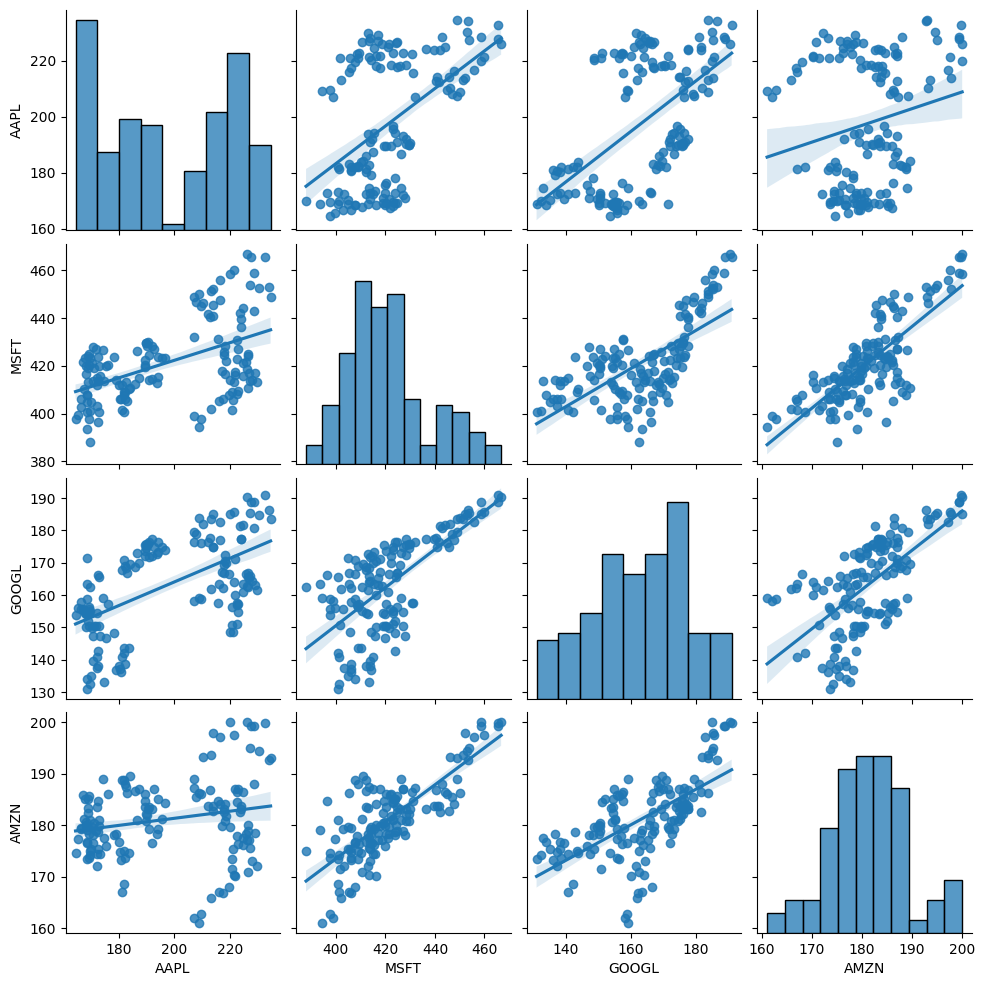

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

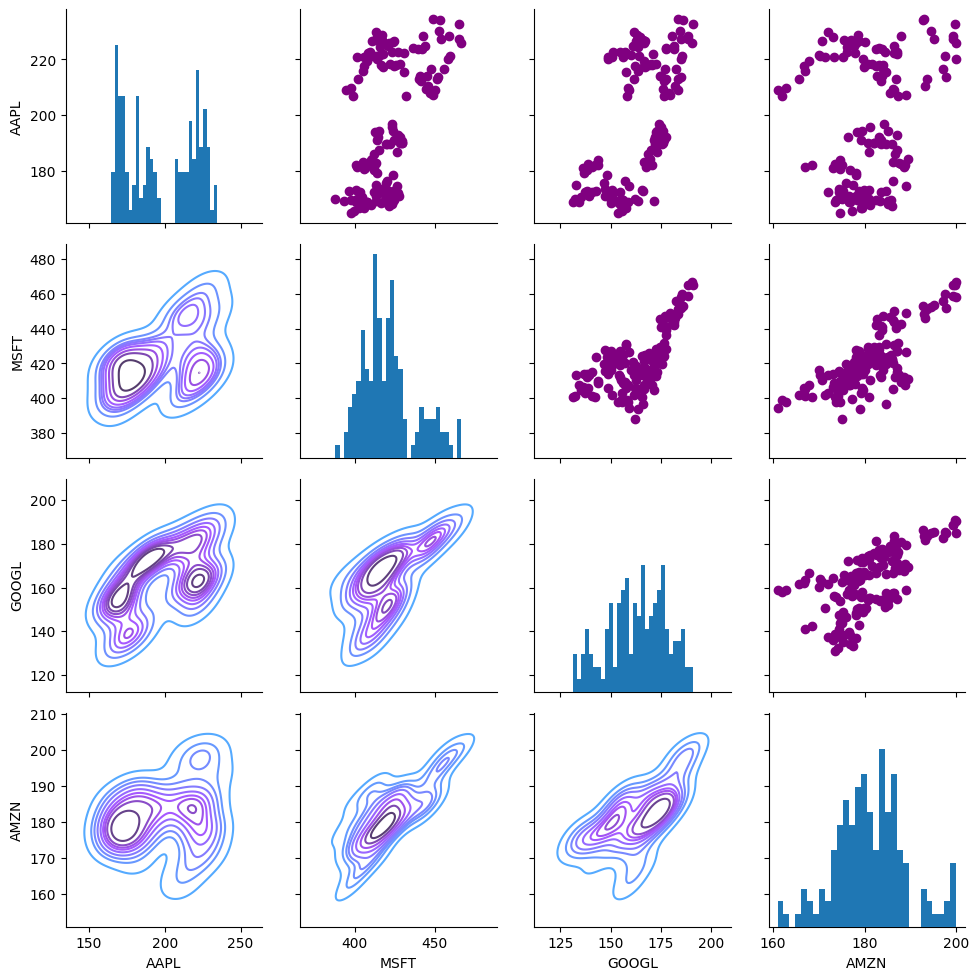

In [110]:
if __name__ == "__main__":
    input_companies = input("Enter the ticker symbols of companies (separated by commas): ").split(',')
    input_companies = [company.strip() for company in input_companies]
    
    
    analyzer = stock_corr(input_companies)
    
    analyzer.export_data()
    analyzer.co_relation()
    analyzer.plot_pairplot()
    analyzer.kde_plot()
   
        

# predcting the plot

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from datetime import datetime, timedelta

class stock_prediction:
    def __init__(self, companies):
        self.companies = companies
        self.company_data = {}
        self.start_date = datetime.now() - timedelta(days=365*2)
        self.end_date = datetime.now()

    def export_data(self):
        for company in self.companies:
            ticker = yf.Ticker(company)
            stock_data = ticker.history(start=self.start_date, end=self.end_date, interval='1d')
            self.company_data[company] = stock_data

    def comparison_plot(self):
        combined_data = pd.DataFrame()
        for company in self.companies:
            data = self.company_data.get(company)
            if data is not None:
                combined_data[company] = data['Close']
        
        combined_data = combined_data.reset_index()
        combined_data.rename(columns={'index': 'Date'}, inplace=True)
        
        plt.figure(figsize=(16,6))
        plt.title('Close Price History')
        for company in self.companies:
            plt.plot(combined_data['Date'], combined_data[company], label=company)
        plt.xlabel('Date', fontsize=18)
        plt.ylabel('Close Price USD ($)', fontsize=18)
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.show()
        
    def prediction_stock(self):
        combined_data = pd.DataFrame()
        for company in self.companies:
            data = self.company_data.get(company)
            if data is not None:
                combined_data[company] = data['Close']
    
    # Reset index to bring 'Date' as a column instead of index
        valid_data = combined_data.reset_index()
        valid_data.rename(columns={'index': 'Date'}, inplace=True)  # Rename 'index' column to 'Date'

    # Ensure we are working with a single company for prediction (e.g., the first company)
        if len(self.companies) == 0:
            print("No companies found")
            return
        company = self.companies[0]
        if company not in valid_data.columns:
            print(f"'{company}' column not found after reset_index")
            return

        dataset = valid_data[company].values.reshape(-1, 1)
        
        split_idx = int(len(dataset) * 0.8)
        train_data = dataset[:split_idx]
        test_data = dataset[split_idx:]

        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_train_data = scaler.fit_transform(train_data)
        scaled_test_data = scaler.transform(test_data)

        x_train, y_train = [], []
        for i in range(60, len(scaled_train_data)):
            x_train.append(scaled_train_data[i-60:i, 0])
            y_train.append(scaled_train_data[i, 0])
        
        if len(x_train) == 0:
            print("Training data is too small. Increase the size of the dataset.")
            return

        x_train, y_train = np.array(x_train), np.array(y_train)
        x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
        model = Sequential()
        model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
        model.add(LSTM(64, return_sequences=False))
        model.add(Dense(25))
        model.add(Dense(1))
    
        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(x_train, y_train, batch_size=1, epochs=10)
    
        x_test, y_test = [], []
        for i in range(60, len(scaled_test_data)):
            x_test.append(scaled_test_data[i-60:i, 0])
            y_test.append(scaled_test_data[i, 0])

        x_test, y_test = np.array(x_test), np.array(y_test)

# Debugging step: Check if x_test has data
        if x_test.shape[0] == 0:
            raise ValueError("Not enough test data to create sequences for LSTM input. Increase the dataset size.")

# Reshaping x_test
        x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
        predictions = model.predict(x_test)

        predictions = scaler.inverse_transform(predictions)
        y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    
        plt.figure(figsize=(16,6))
        plt.plot(y_test, label='Actual Prices')
        plt.plot(predictions, label='Predicted Prices')
        plt.xlabel('Time', fontsize=18)
        plt.ylabel('Price USD ($)', fontsize=18)
        plt.title('Stock Price Prediction vs Actual Prices')
        plt.legend()
        plt.show()


        
        
        
        
        
        

Enter the ticker symbols of companies (separated by commas):   AAPL, MSFT, GOOGL, AMZN


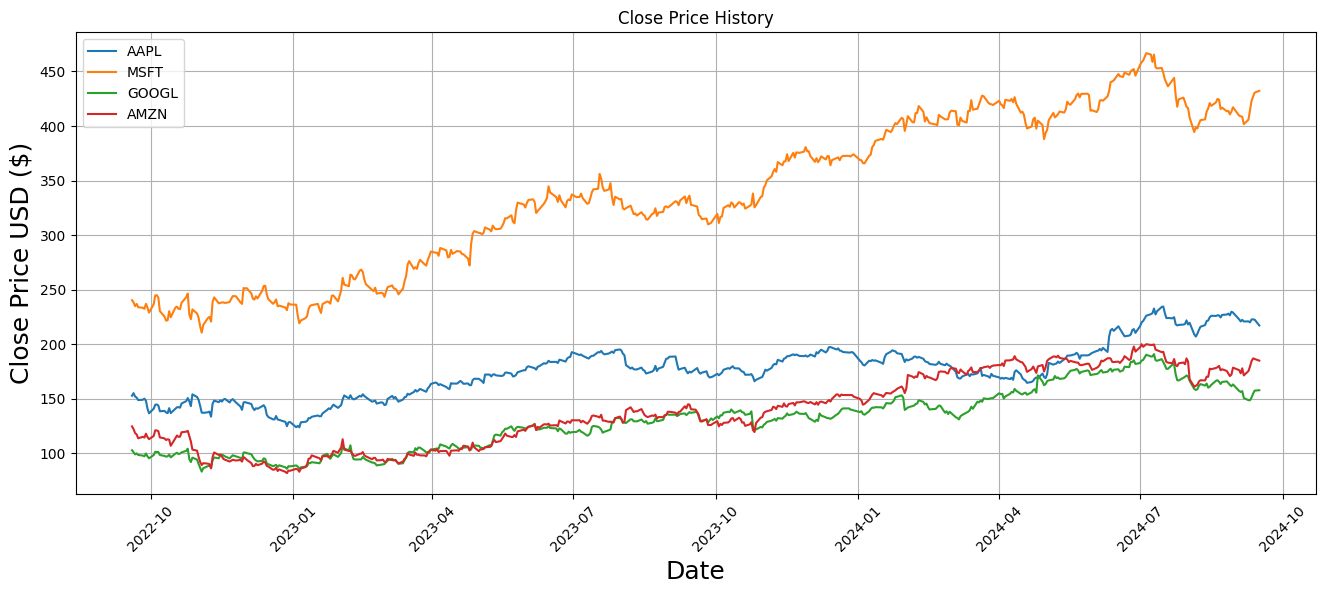

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


340/340 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - loss: 0.0413
Epoch 2/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 0.0051
Epoch 3/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 0.0034
Epoch 4/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 0.0036
Epoch 5/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 0.0027
Epoch 6/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 0.0022
Epoch 7/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - loss: 0.0019
Epoch 8/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - loss: 0.0016
Epoch 9/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - loss: 0.0018
Epoch 10/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - loss: 0.0013
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 371ms/step


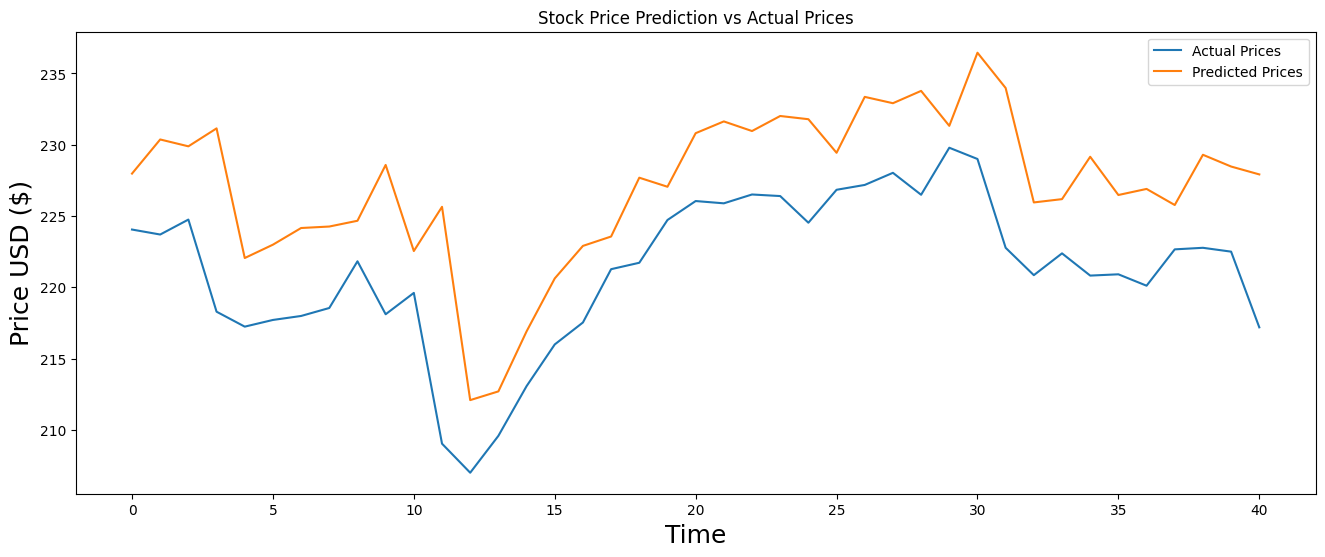

In [117]:
if __name__ == "__main__":
    input_companies = input("Enter the ticker symbols of companies (separated by commas): ").split(',')
    input_companies = [company.strip() for company in input_companies]
    
    
    analyzer = stock_prediction(input_companies)
    
    analyzer.export_data()
   
    analyzer.comparison_plot()
    analyzer.prediction_stock()